EMPLOYEE ATTRITION PREDICTION

In [ ]:
#importing the required libraries (we may impoort more later if needed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#importing the dataset
emp_data = pd.read_csv("C:\GIT\Attrition-Prediction\Dataset01-Employee_Attrition.csv")
emp_data.head()

<>:2: SyntaxWarning: invalid escape sequence '\G'
<>:2: SyntaxWarning: invalid escape sequence '\G'
C:\Users\abhis\AppData\Local\Temp\ipykernel_1188\3853433055.py:2: SyntaxWarning: invalid escape sequence '\G'
  emp_data = pd.read_csv("C:\GIT\Attrition-Prediction\Dataset01-Employee_Attrition.csv")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
#checking the number of rows and columns in the dataset
emp_data.shape

(14999, 10)

the column "left" is our target variable as we are trying to predict, if the employee is going to stay with the company or not

In [ ]:
#printing the name of columns in our dataset
for col in emp_data.columns:
    print (col)

satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


In [15]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
emp_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [21]:
#checking for duplicate records
emp_data[emp_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
emp_data1 = emp_data.drop_duplicates()
emp_data1.shape

(11991, 10)

earlier we had (14999,10) records and after dropping the 3008 duplicate data rows we are left with (11991,10) records which have no remaining deupliactes in the dataset

In [23]:
emp_data1.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

there are no null value in our newly created dataset

DATA EXPLORATION AND VISUALISATION

0 - employee stays 
1 - employee leaves

In [31]:
left_counts = emp_data1['left'].value_counts()
left_counts

left
0    10000
1     1991
Name: count, dtype: int64

In [33]:
import plotly.express as px
# Create a Plotly bar plot
fig = px.bar(left_counts, x=left_counts.index, y=left_counts.values, 
             labels={'x': 'emp_count', 'y': 'Count'}, 
             title="Employee Attrition Count")
fig.update_layout(template="plotly_dark") 
fig.show()

In [34]:
emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Axes: xlabel='salary'>

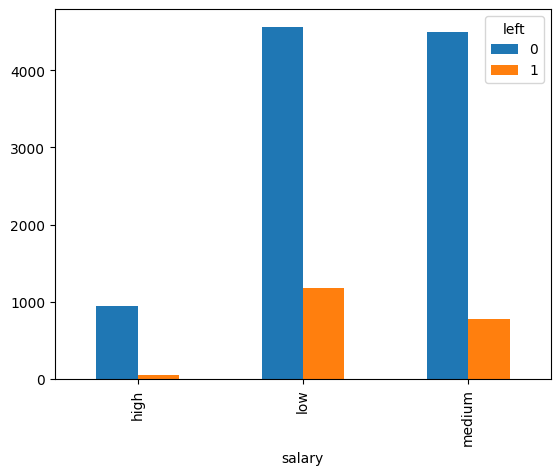

In [35]:
pd.crosstab(emp_data1.salary,emp_data1.left).plot(kind='bar')

although the difference in retention is significant because of the imbalance in the dataset, still we can see that the low and medium salary employees are more likely to leave than the high salary employees.

In [37]:
pd.crosstab(emp_data1.salary,emp_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


In [43]:
print("high:", 48*100/942, "%")
print("medium:", 769*100/4492, "%")
print("low:", 1174*100/4566, "%")

high: 5.095541401273885 %
medium: 17.119323241317897 %
low: 25.711782742006132 %


Department wise employee retention rate

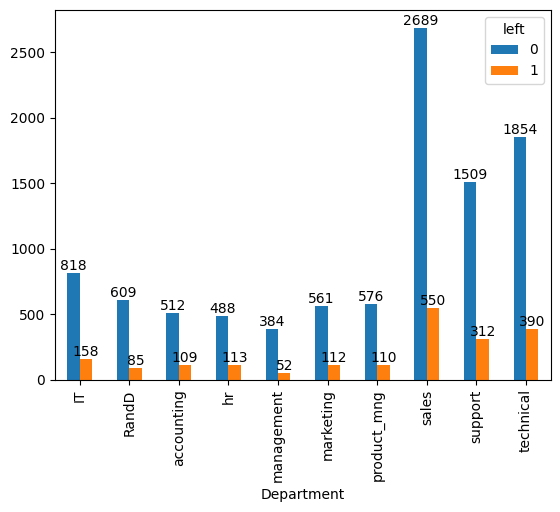

In [46]:
crosstab_data = pd.crosstab(emp_data1.Department, emp_data1.left)
ax = crosstab_data.plot(kind='bar')

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Display the plot
plt.show()

Distribution of numerical and non-numerical features

In [58]:
num_feature_list = [f for f in emp_data1.columns if emp_data1.dtypes[f] == 'float64']
num_feature_list

['satisfaction_level', 'last_evaluation']

In [59]:
num_feature_list = [f for f in emp_data1.columns if emp_data1.dtypes[f] == 'int64']
num_feature_list

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [60]:
num_col_list1 = ['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [61]:
num_col_list2 = ['satisfaction_level', 'last_evaluation']

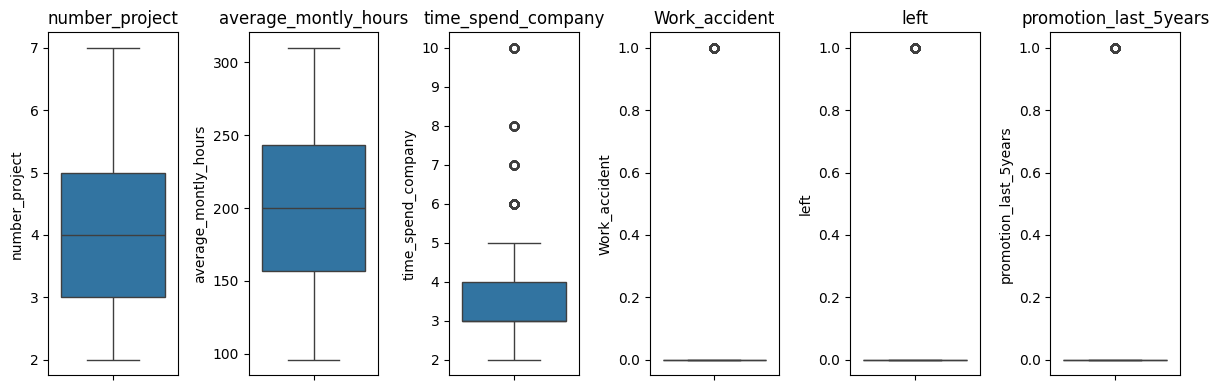

In [62]:
fig,axes = plt.subplots (ncols=6, figsize=(12,4))
for column, axis in zip(num_col_list1 [:], axes):
    sns.boxplot(data=emp_data1[column],ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

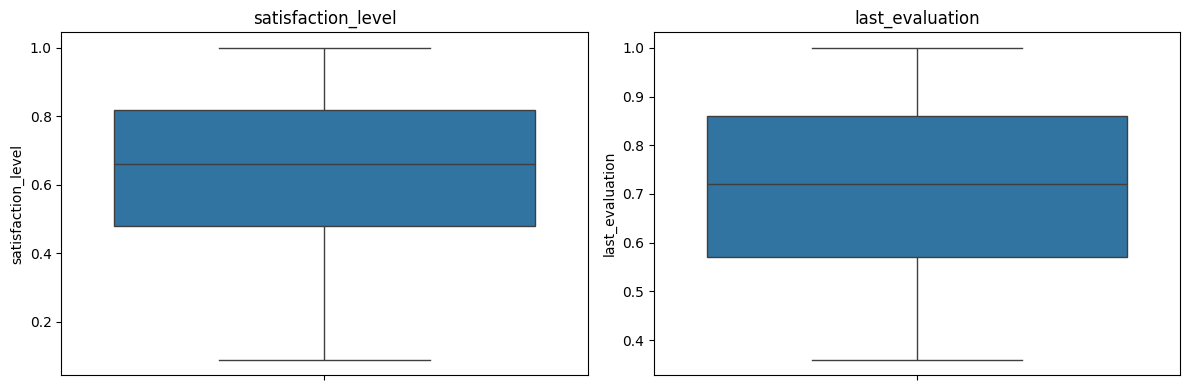

In [63]:
fig,axes = plt.subplots (ncols=2, figsize=(12,4))
for column, axis in zip(num_col_list2 [:], axes):
    sns.boxplot(data=emp_data1[column],ax = axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()